In [64]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

## Get Data

In [65]:
x, y = make_classification(n_samples=100, 
                           n_features=3, 
                           n_informative=2, 
                           n_redundant=0, 
                           n_repeated=0, 
                           n_classes=4, 
                           n_clusters_per_class=1, 
                           flip_y=0.1, 
                           random_state=42)

## Standardize Data

In [66]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

## Create Model and Train it

In [67]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

## Evaluate Model

In [68]:
print(f"Predict_proba: {model.predict_proba(x)}")
print(f"Predict: {model.predict(x)}")
print(f"Score: {model.score(x, y)}")

Predict_proba: [[0.2470312  0.63884189 0.01109622 0.1030307 ]
 [0.10780143 0.5192636  0.00350241 0.36943255]
 [0.81404433 0.09695802 0.03983477 0.04916288]
 [0.01706919 0.15726283 0.05770658 0.76796139]
 [0.05491672 0.48689705 0.00104212 0.45714411]
 [0.73554482 0.16718514 0.06470145 0.03256858]
 [0.16244927 0.01072724 0.75299208 0.07383141]
 [0.06497899 0.14906247 0.20509781 0.58086072]
 [0.37419387 0.00746666 0.56887918 0.04946029]
 [0.58143619 0.19928938 0.08424003 0.1350344 ]
 [0.01649567 0.08537755 0.21004976 0.68807702]
 [0.05852012 0.01163944 0.55705258 0.37278786]
 [0.4193548  0.52483284 0.01057227 0.04524009]
 [0.13708837 0.01095359 0.76883755 0.08312049]
 [0.61122967 0.18670776 0.12116602 0.08089655]
 [0.01837912 0.01318059 0.58629417 0.38214611]
 [0.70032485 0.14303815 0.10204308 0.05459392]
 [0.05390419 0.01238897 0.47854651 0.45516033]
 [0.1539502  0.51978565 0.00269819 0.32356595]
 [0.28232945 0.51700409 0.00170334 0.19896313]
 [0.23595569 0.56394847 0.00292433 0.1971715 

### Confusion Matrix

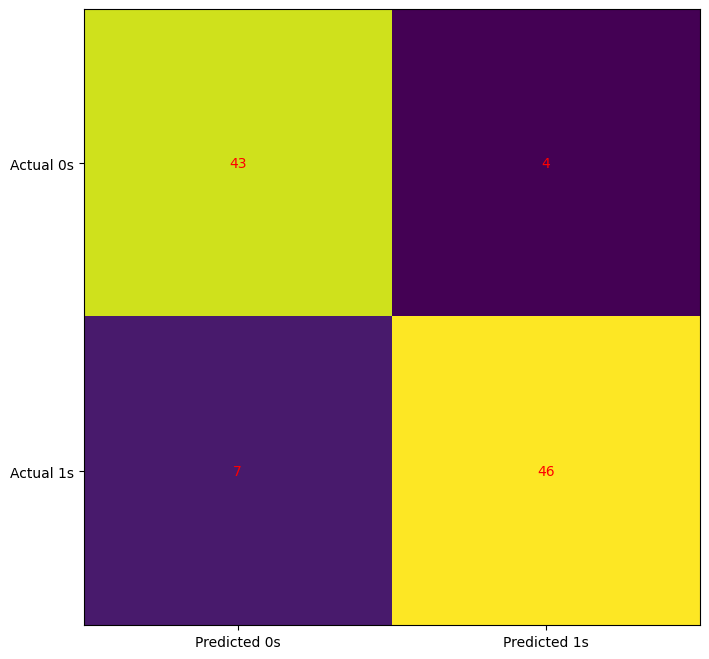

In [61]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Graph

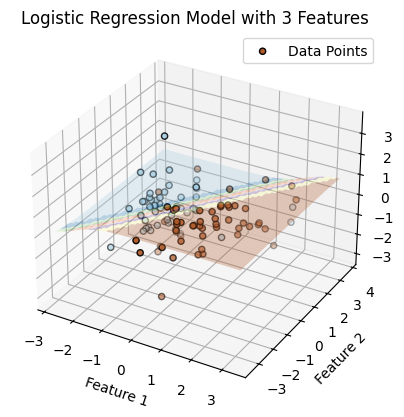

In [62]:
from mpl_toolkits.mplot3d import Axes3D

X = x
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, edgecolor='k', cmap=plt.cm.Paired, label='Data Points')

# Create a meshgrid for two features (e.g., feature 1 and feature 2)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))

# Predict the third feature (feature 3) using the model
# You might need to adjust the prediction based on how your model is structured
zz = model.predict_proba(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])[:, 1]
zz = zz.reshape(xx.shape)

# Plot decision boundary surface
ax.plot_surface(xx, yy, zz, alpha=0.3, cmap=plt.cm.Paired)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('Logistic Regression Model with 3 Features')
plt.legend()
plt.show()